## Homework #5 - Principal Component Analysis

### Overview:
Till now, you learned 2 algorithms for supervised Machine Learning.
However, in the real world, labeled data is very expensive. It often costs
a lot for a company to get labeled data, and they are asked to work
with the unlabeled one and extract hints and insights from it. In this
task, we invite you to explore one of the types of unsupervised learning - Dimensional Reduction.
This task is made up of 2 subtasks:

### Subtask 1:
In the first, you are going to work with the Iris Data Set.
* Load the Data Set (https://bit.ly/3WiUJ7W)
* Plot the first 3 columns of the Data Set and the target column in a
3d scatter plot.

    HINT: Use the target column as a hue for the points.

    LINK: (https://bit.ly/3SRIsEJ)

* Copy the implementation of the Principal Component Analysis algorithm from SMLH.
* Create an instance of the Scratch-made PCA algorithm using the
eigenvector algorithm.
* Create an instance of the Scratch-made PCA algorithm using the
SVD algorithm.
* Create an instance of sklearn and implement a PCA algorithm.
* Apply StandardScaler from sklearn on the data.
* Train all created instances of PCA on the iris data.
* Use each created instance of PCA to reduce the dimensionality of
the Data Set to 2, creating in such a way 3 separated Data Sets.
* Create a plot that combines 3 scatter plots and plots each of the
result Data Sets in a separate window. Each window should be related
to which version of the PCA was used.

    HINT: (https://bit.ly/3DIzAwW)

* Try to conclude what you see by comparing the results of each
algorithm and the 3d scatter plot you made before.
* Retrain a sklearn PCA model on the iris Data Set with n components
set to 1.
* Create a line plot of the explained variance ratio.
* Try to make a conclusion based on that plot.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
from sklearn.datasets import load_iris, load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# %matplotlib notebook

First step is to load the Iris dataset. I use the sklearn load_iris() method with parameter as_frame=True in order to return it in Dataframe format rather than numpy array, as it
does by default.

In [2]:
dataset_iris: pd.DataFrame = load_iris(as_frame=True).frame

In [3]:
dataset_iris.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
dataset_iris.tail(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


Next, I should plot 3D scatterplot of first 3 columns of the dataset. For that, I use

In [5]:
dataset_first_columns = pd.concat([dataset_iris.iloc[:, :3], dataset_iris["target"]], axis='columns')
dataset_first_columns

,sepal length (cm),sepal width (cm),petal length (cm),target
0,5.1,3.5,1.4,0
1,4.9,3.0,1.4,0
2,4.7,3.2,1.3,0
3,4.6,3.1,1.5,0
4,5.0,3.6,1.4,0
...,...,...,...,...
145,6.7,3.0,5.2,2
146,6.3,2.5,5.0,2
147,6.5,3.0,5.2,2
148,6.2,3.4,5.4,2


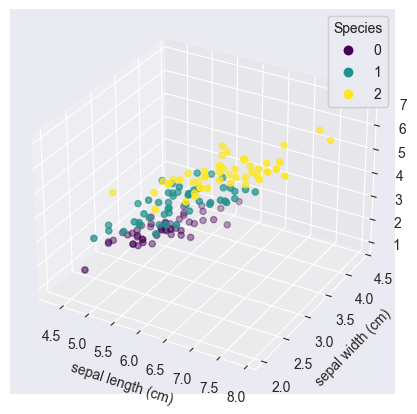

In [6]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(projection='3d')
scatter_plot = ax.scatter(dataset_first_columns.iloc[:, 0], dataset_first_columns.iloc[:, 1], dataset_first_columns.iloc[:, 2], c=dataset_first_columns.iloc[:, 3], cmap='viridis')
ax.set_xlabel(dataset_first_columns.columns[0])
ax.set_ylabel(dataset_first_columns.columns[1])
ax.set_zlabel(dataset_first_columns.columns[2])

legend = ax.legend(*scatter_plot.legend_elements(), title="Species")
ax.add_artist(legend)

plt.show()

#### SMLH PCA Implementation

In [7]:
class myPCA:
    def __init__(self, n_components : int = 2 , method : str = 'svd') -> None:
        """
        The constructor of the PCA algorithm.
        :param n_compoents: int, default = 2
        The dimension to which the data will be
        reduced.
        :param method: str, default = 'svd'
        The method used by PCA to reduce the
        dimensionality of the data.
        """
        self.__n_components = n_components
        if method in ['svd', 'eigen']:
            self.__method = method
        else:
            raise ValueError(f"'{method}' is not a method implemented in this model")
    def fit(self, X : 'np.array'):
        """
        The fitting method.
        :param X: np.array
        The data on which we want to fit the PCA
        """
        if self.__method == 'svd':
            U, S, V = np.linalg.svd(X)
            self.__V = V[:self.__n_components, :]
        elif self.__method == 'eigen':
            corr_mat = np.corrcoef(X.T)
            # Getting the eigenvectors and eigenvalues
            self.eig_vals, self.eig_vecs = np.linalg.eig(corr_mat)
            # Sorting the list of tuples (eigenvalue, eigenvector)
            self.eig_pairs = [(np.abs(self.eig_vals[i]), self.eig_vecs[:, i]) for i in range(len(self.eig_vals))]
            self.eig_pairs.sort(key=lambda x: x[0], reverse=True)
            # Calculating the explained ration
            total = sum(self.eig_vals)
            self.explained_variance_ratio = [(i/total)* 100 for i in sorted(self.eig_vals, reverse= True)]
            self.cumulative_variance_ratio = np.cumsum(self.explained_variance_ratio)
            # Creating the projection matrix
            list_eigen_pairs = [self.eig_pairs[i][1].reshape(np.size(X, 1), 1) for i in range(self.__n_components)]
            self.matrix_w = np.hstack(tuple(list_eigen_pairs))
        return self
    def transform(self, X : 'np.array') -> 'np.array':
        """
        The transform function.
        :param X: np.array
        The data that we must reduce.
        """
        if self.__method == 'svd':
            return X.dot(self.__V.T)
        elif self.__method == 'eigen':
            return X.dot(self.matrix_w)


For the first step of PCA algorithm, I need to standardize the dataset. For this, I will follow the SMLH and apply StandardScaler from scikit-learn

In [8]:
X = dataset_iris.iloc[:, :4]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = dataset_iris['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [10]:
standardScaler = StandardScaler()
X_scaled = standardScaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)

In [11]:
X_scaled_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [12]:
custom_pca_eigen = myPCA(method='eigen')
custom_pca_eigen

In [13]:
custom_pca_svd = myPCA(method='svd')
custom_pca_svd

In [14]:
sklearn_pca = PCA(n_components=2)
sklearn_pca

PCA(n_components=2)

In [15]:
custom_pca_eigen.fit(X_scaled)
custom_pca_svd.fit(X_scaled)
sklearn_pca.fit(X_scaled)

PCA(n_components=2)

In [16]:
X_custom_pca_eigen = custom_pca_eigen.transform(X_scaled)
X_custom_pca_svd = custom_pca_svd.transform(X_scaled)
X_sklearn_pca = sklearn_pca.transform(X_scaled)

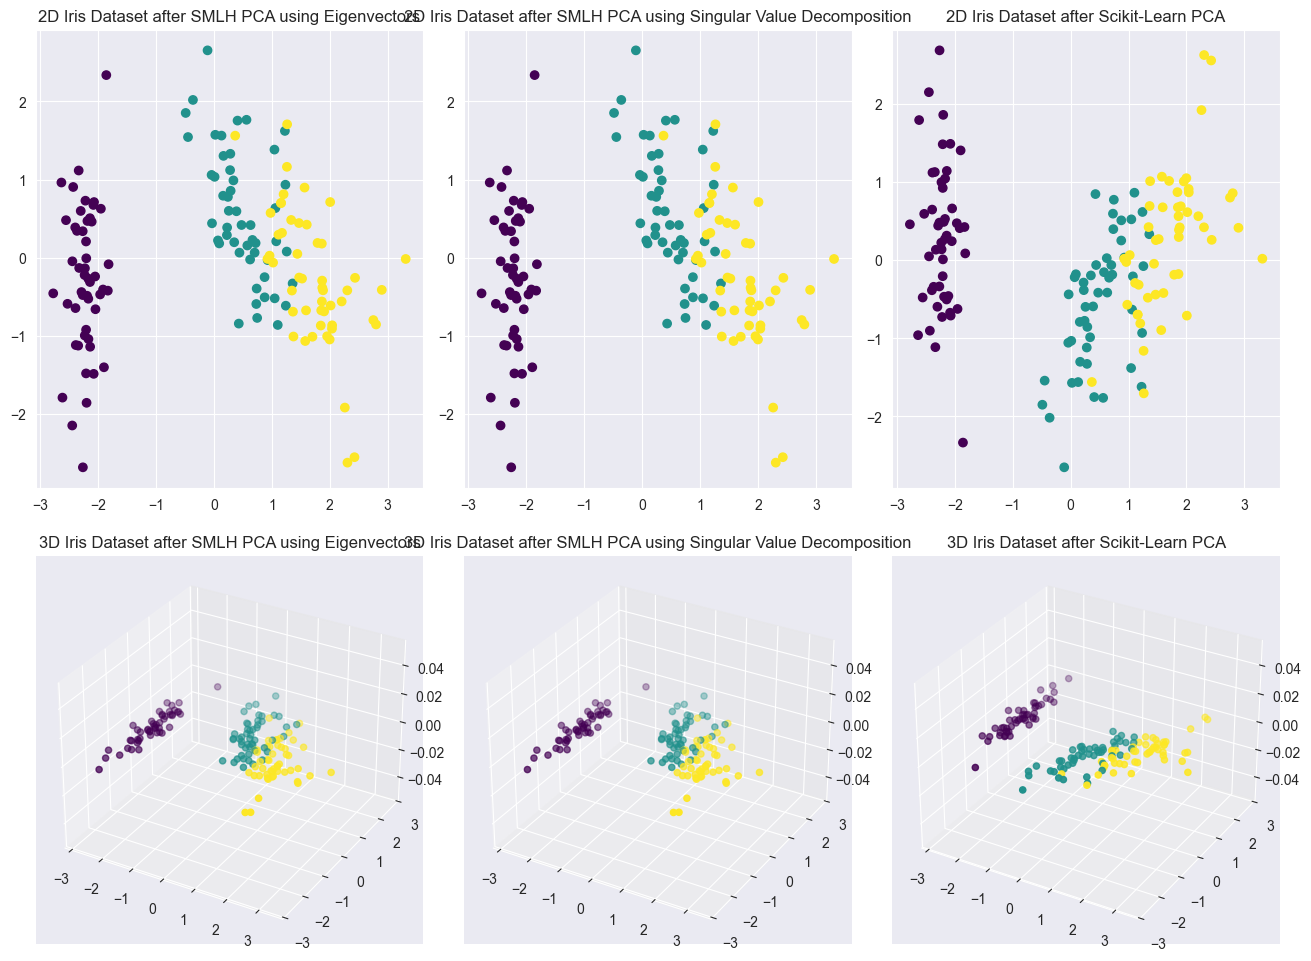

In [17]:
fig = plt.figure(figsize=(13, 10))

ax1 = fig.add_subplot(2, 3, 1)
ax1.scatter(X_custom_pca_eigen[:, 0], X_custom_pca_eigen[:, 1], c=y, cmap='viridis')
ax1.set_title("2D Iris Dataset after SMLH PCA using Eigenvectors")

ax2 = fig.add_subplot(2, 3, 2)
ax2.scatter(X_custom_pca_svd[:, 0], X_custom_pca_svd[:, 1], c=y, cmap='viridis')
ax2.set_title("2D Iris Dataset after SMLH PCA using Singular Value Decomposition")

ax3 = fig.add_subplot(2, 3, 3)
ax3.scatter(X_sklearn_pca[:, 0], X_sklearn_pca[:, 1], c=y, cmap='viridis')
ax3.set_title("2D Iris Dataset after Scikit-Learn PCA")

ax4 = fig.add_subplot(2, 3, 4, projection='3d')
ax4.scatter(X_custom_pca_eigen[:, 0], X_custom_pca_eigen[:, 1], c=y, cmap='viridis')
ax4.set_title("3D Iris Dataset after SMLH PCA using Eigenvectors")

ax5 = fig.add_subplot(2, 3, 5, projection='3d')
ax5.scatter(X_custom_pca_svd[:, 0], X_custom_pca_svd[:, 1], c=y, cmap='viridis')
ax5.set_title("3D Iris Dataset after SMLH PCA using Singular Value Decomposition")

ax6 = fig.add_subplot(2, 3, 6, projection='3d')
ax6.scatter(X_sklearn_pca[:, 0], X_sklearn_pca[:, 1], c=y, cmap='viridis')
ax6.set_title("3D Iris Dataset after Scikit-Learn PCA")

plt.tight_layout()
plt.show()

As it may be noticed, the dimensionality of the dataset was reduced to 2 dimensions from 4 that were initially. Both SMLH implementations look pretty much the same, but
scikit-learn implementation is slightly different - the values have inverse signs. This is due to the fact that Scikit-learn actually make the sign opposite. I found that the sign in eigenvectors plays no role since it does not affect the variance of the dataset [[1]](https://stats.stackexchange.com/questions/205713/does-the-sign-of-eigenvectors-matter) and [[2]](https://stats.stackexchange.com/questions/88880/does-the-sign-of-scores-or-of-loadings-in-pca-or-fa-have-a-meaning-may-i-revers). At the same time, scikit-learn wants
to ensure that left and right singular vectors U and V are always the same [[3]](https://stackoverflow=.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative). However, this does not affect the result of the SVD, as I understood, because the operation does not affect the variance.

Comparing the 3D plots, I observed that it became a linear one, a plane that is much easier to use to train a model. By the use of PCA, I got more variance in the data and, at the
same time, a reduced dataset, with small loss of information, that may be omitted for simplicity, since it will carry less valuable information, or information that may interfere with the model fair training.

In [18]:
sklearn_pca_1 = PCA(n_components=1)
sklearn_pca_1.fit(X_scaled)

PCA(n_components=1)

In [19]:
X_sklearn_pca_1 = sklearn_pca_1.transform(X_scaled)
X_sklearn_pca_1

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217],
       [-2.07563095],
       [-2.44402884],
       [-2.23284716],
       [-2.33464048],
       [-2.18432817],
       [-2.1663101 ],
       [-2.32613087],
       [-2.2184509 ],
       [-2.6331007 ],
       [-2.1987406 ],
       [-2.26221453],
       [-2.2075877 ],
       [-2.19034951],
       [-1.898572  ],
       [-2.34336905],
       [-1.914323  ],
       [-2.20701284],
       [-2.7743447 ],
       [-1.81866953],
       [-2.22716331],
       [-1.95184633],
       [-2.05115137],
       [-2.16857717],
       [-2.13956345],
       [-2.26526149],
       [-2.14012214],
       [-1.83159477],
       [-2.61494794],
       [-2.44617739],
       [-2.10997488],
       [-2.2078089 ],
       [-2.04514621],
       [-2.52733191],
       [-2.42963258],
       [-2.16971071],
       [-2.28647514],
       [-1.85812246],
       [-2.5536384 ],
       [-1.96444768],
       [-2.13705901],
       [-2

In [20]:
sklearn_pca_1.explained_variance_ratio_

array([0.72962445])

Explained variance is a measure of how much of the total variance in the original dataset is explained by each principal component. The explained variance of a principal component is equal to the eigenvalue associated with that component. It is basically the eigenvalue attached to the eigenvector. In order to obtain a more useful information, I used
explained variance ration, which is a measure of the proportion of the total variance in the original dataset that is explained by each principal component. The explained variance ratio of a principal component is equal to the ratio of its eigenvalue to the sum of the eigenvalues of all the principal components.

In this case, this value shows that the Principal Component to which was the dataset reduced explains 92% of the dataset, in other words, it contributes 92% to the actual data in the dataset, it captures 92% of the variance of the dataset.



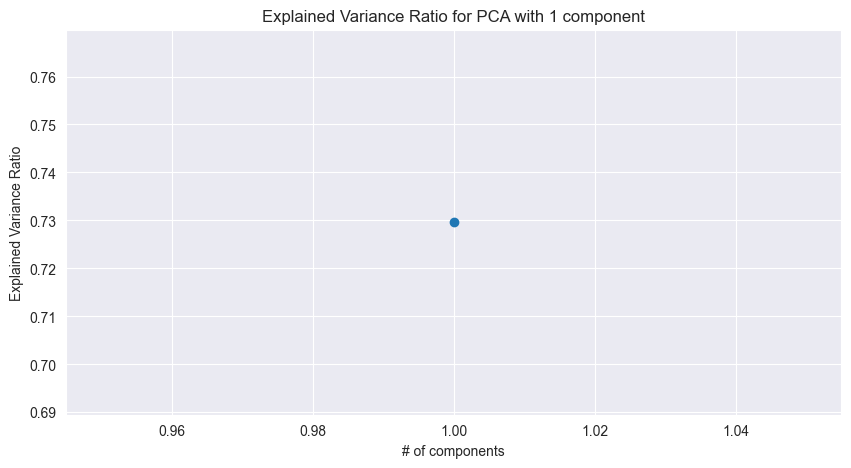

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(len(sklearn_pca_1.components_), sklearn_pca_1.explained_variance_ratio_, "o")

plt.title("Explained Variance Ratio for PCA with 1 component")
plt.xlabel("# of components")
plt.ylabel("Explained Variance Ratio")
plt.show()

### Subtask 2:
In the second task, you will work with another Data Set - images of
digits:
* First, load the Data Set: (https://bit.ly/3SOwFqL)
* Second plot in a multiple window plot 10 random digits with a title
having the digit from the image on a 2 x 5 grid.
* Create an instance of the sklearn PCA.
* Apply scaling on the digit Data Set.
* Train the PCA on the digit Data Set.
* Reduce the dimensionality of the Data Set to 2 dimensions.
* Plot the new result Data Set in a scatter plot with each point colored
by its digit label

In [22]:
dataset_digits = load_digits(as_frame=True)
dataset_images = dataset_digits.images
dataset_digits_frame: pd.DataFrame = dataset_digits.frame
X_digits = dataset_digits_frame.drop(columns=['target'])
y_digits = dataset_digits_frame['target']

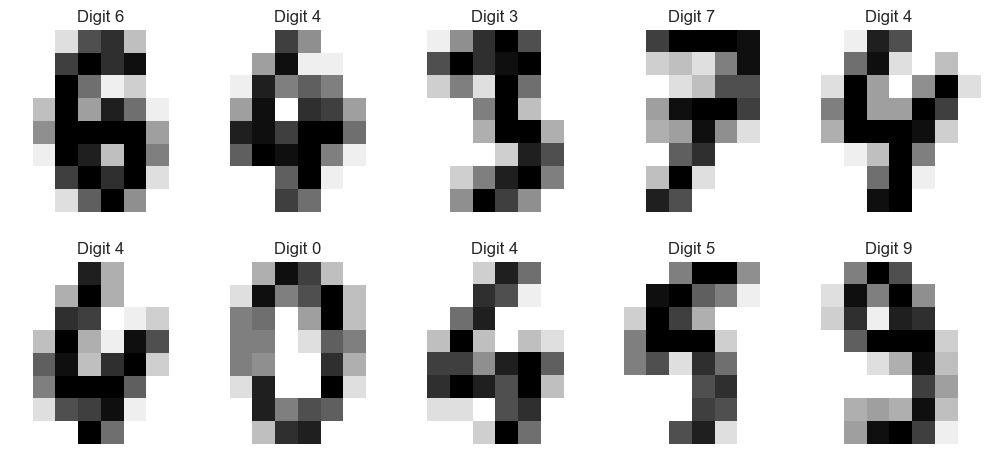

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for index, ax in enumerate(axes.flat):
    random_index = np.random.randint(0, len(dataset_digits_frame.index))
    random_training_example = dataset_digits_frame.iloc[random_index, :]
    ax.imshow(dataset_images[random_index], cmap='binary')
    ax.set_title(f"Digit {dataset_digits_frame.iloc[random_index, -1]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [24]:
standard_digits_scaler = StandardScaler()
X_digits_scaled = standardScaler.fit_transform(X_digits)

In [25]:
pca_digits = PCA(n_components=2)
pca_digits.fit(X_digits_scaled)
X_pca_digits = pca_digits.transform(X_digits_scaled)
X_pca_digits

array([[-1.91421366, -0.95450157],
       [-0.58898033,  0.9246358 ],
       [-1.30203906, -0.31718883],
       ...,
       [-1.02259599, -0.14791087],
       [-1.07605522, -0.38090625],
       [ 1.25770233, -2.22759088]], shape=(1797, 2))

In [26]:
np.sort(pca_digits.explained_variance_ratio_)

array([0.09561054, 0.12033916])

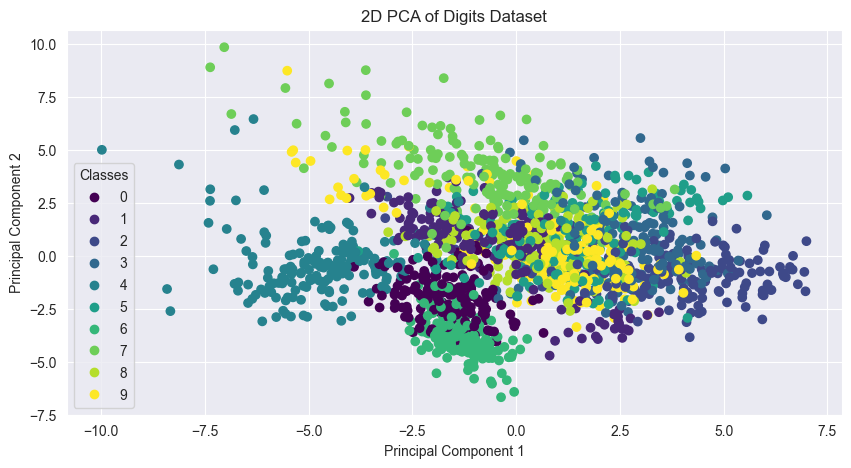

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

scatter = ax.scatter(X_pca_digits[:, 0], X_pca_digits[:, 1], c=y_digits, cmap='viridis', label=y_digits)

handles, labels = scatter.legend_elements()
ax.legend(handles, labels, title="Classes")

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2D PCA of Digits Dataset')

plt.show()